<a href="https://colab.research.google.com/github/carlosfmorenog/CMM560/blob/main/CMM560_Topic_5/CMM560_T5_Lec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 5 - Image Pre-processing and Feature Extraction

## Aim of the Session

* Learn about the most basic methods that help us clean images

* Understand how images are converted into a set of features used for machine learning purposes

## Resources for the Lecture

### Websites

* https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
* https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html
* https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients
* https://www.learnopencv.com/histogram-of-oriented-gradients/
* https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework
* https://realpython.com/traditional-face-detection-python/
* https://github.com/opencv/opencv/tree/master/data/haarcascades

### Papers

* Nobuyuki Otsu (1979). "A threshold selection method from gray-level histograms". IEEE Trans. Sys. Man. Cyber. 9 (1): 62–66.
* N. Dalal and B. Triggs, “Histograms of oriented gradients for human detection,” Computer Vision and Pattern Recognition (CVPR), vol. I, pp. 886–893, 2005.
* D. G. Lowe, “Object recognition from local scale-invariant features,” International Conference on Computer Vision (ICCV), vol. 2, no. 8, pp. 1150–1157, 1999.
* H. Bay, T. Tuytelaars, and L. Van Gool, “SURF: Speeded up robust features,” Lecture Notes in Artificial Intelligence, vol. 3951, pp. 404–417, 2006.

## Image Preprocessing

* Before actually working with images as data, there are plenty of techniques that can be applied to improve quality

* Not all images are perfect, especially in the document image analysis

![Fig. 9. An engineering drawing with poor resolution](https://www.dropbox.com/s/x7320umcr44sl1f/ed.jpg?raw=1)

#### THRESHOLDING/BINARISATION

![Fig. 10. An example of binarisation](https://www.dropbox.com/s/nqkcytkcely4n3t/bin.jpg?raw=1)

* Converting a grayscale image into a binary (black/white) image based on a threshold

* Useful to improve the quality of an image and to refine shapes

### How to binarise an image?

First, load the image in grayscale mode

In [1]:
# with this cell, we import the data from GitHub (it's easier!)
!git clone https://github.com/carlosfmorenog/CMM560

Cloning into 'CMM560'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 209 (delta 14), reused 17 (delta 3), pack-reused 160 (from 2)
Receiving objects: 100% (209/209), 53.02 MiB | 11.62 MiB/s, done.
Resolving deltas: 100% (25/25), done.


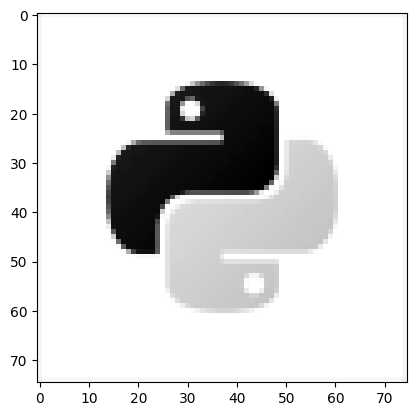

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("/content/CMM560/CMM560_Topic_5/data/logo.png",0)
plt.imshow(img, cmap='Greys_r')
plt.show()

Then, you need a function that traverses over **all** pixels and compares their values against a threshold. If the value found is larger than the threshold, then the values is changed to 255, otherwise, it is changes to 0.

In [3]:
## We define a function called binarise with two params, the image and the threshold
def binarise(img, threshold):
    '''This function biniarises an image in a numpy array according to the specified threshold'''
    img_bin = img.copy()
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x,y]<threshold:
                img_bin[x,y]=0
            else:
                img_bin[x,y]=255
    plt.imshow(img_bin, cmap='Greys_r')
    return img_bin

Now, we can call our function using the loaded image

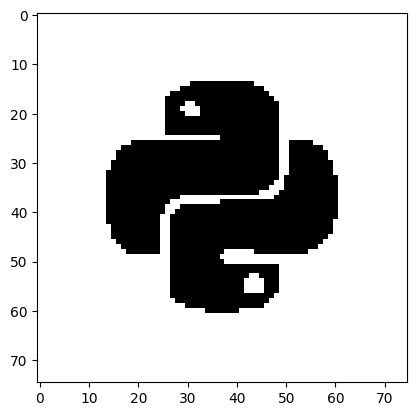

In [4]:
## Use this cell to execute the binarise function and show both pythons in black.
img_bin1 = binarise(img, 220)
plt.show()

If we change the threshold value, then funny things can happen!

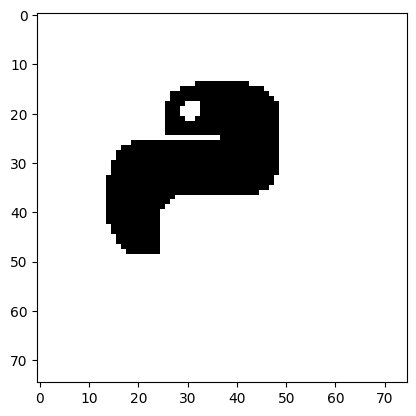

In [5]:
## Use this cell to execute the binarise function to show only the dark python and "disappear" the light one.
img_bin2 = binarise(img, 200)
plt.show()

#### The cv2 option

Click [here](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html) to see a very comprehensive tutorial on how to use the binarisation function contained in `OpenCV`.

Then apply the function to do the same things that you did with your function.

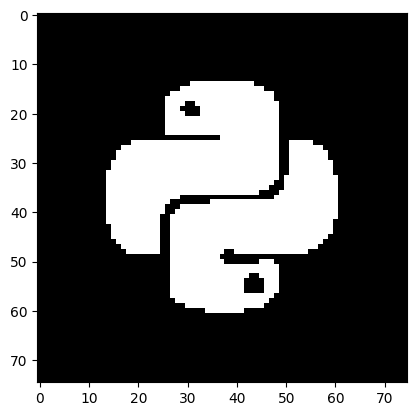

In [6]:
## Use this cell to execute the cv2.threshold function and show both pythons in black.
_,thresh1 = cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh1, cmap='Greys_r')
plt.show()

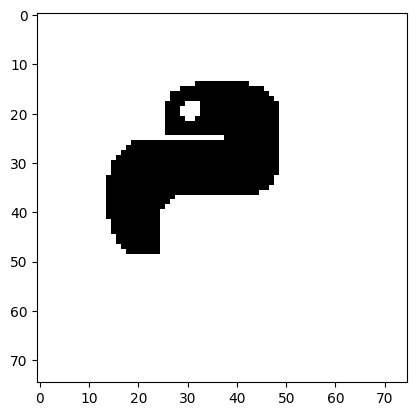

In [7]:
## Use this cell to execute the cv2.threshold function and show only the dark and "disappear" the light one.
_,thresh2 = cv2.threshold(img,190,255,cv2.THRESH_BINARY)
plt.imshow(thresh2, cmap='Greys_r')
plt.show()

#### Saving the image

You can save any of the images produced in this tutorial by using either the `cv2.imwrite` or the `plt.imsave` command.

For instance, to save the binarised image, use the following command:

In [8]:
cv2.imwrite('thresh2.png',thresh2)

True

I recommend to use `cv2.imwrite`, given that the `plt` option will save it with the yellow background by default.

#### Bonus: Can you "disappear" only the top Python?

### Other pre-processing techniques

#### Skew Correction

![Fig. 11. Skew correction](https://www.dropbox.com/s/ckge1t0aqz1j3j0/skew.jpg?raw=1)

#### Erosion and Dilation

![Fig. 12. Erosion and dilation](https://www.dropbox.com/s/j6ifsppdurwimzh/erodil.jpg?raw=1)

#### Opening

![Fig. 13. Image opening](https://www.dropbox.com/s/rqafolr87eyeot3/open.jpg?raw=1)

#### Closing

![Fig. 14. Image closing](https://www.dropbox.com/s/1tx3qriiqsnr78j/close.jpg?raw=1)

## Feature Extraction

Features are the most important component of data science

Think about any data science problem that you have faced so far

You have to analyse a series of data records/entries, each possessing a fixed amount of attributes to describe them

![Fig. 1. An example of data](https://www.dropbox.com/s/rpwcnj7fzygsfdr/data.jpg?raw=1)

### Features in images

How do you assemble a jigsaw puzzle?

![Fig. 2. Jigsaw](https://www.dropbox.com/s/659ta4spioz8pea/jigsaw.jpg?raw=1)

Can we project the same logic to the computer?

Can we project the same logic to data science as a whole?

### Pattern Recognition

The computer will look for specific **patterns** which are

    - unique
    - easy to track
    - easy to compare

Which are the **best** features to do so!

Take a look at this image and find the features:

![Fig. 3. Find the features](https://www.dropbox.com/s/nvizljjmuh204ul/feature_building.jpg?raw=1)

![Fig. 3. Find the features](https://www.dropbox.com/s/nvizljjmuh204ul/feature_building.jpg?raw=1)

* A and B are flat surfaces and difficult to find as an exact match

* C and D are simpler (edges of the building), however their exact location is difficult to find

* E and F are corners of the building, and can be easily found based on their **patch**

Taking a simpler example you can see that **corners** are usually the most intuitive **structural features**

![Fig. 4. Simple example of feature detection](https://www.dropbox.com/s/w3wxoqkd4mfzii5/feature_simple.jpg?raw=1)

There are other good features, such as blobs, changes of intensity, etc.

## Feature detection and extraction algorithms

Last week, we saw that pixels can be used to create datasets

Nonetheless, sometimes it is better to **extract** features from images, which results in a 2D feature vector that can be used instead!

Today, we will see two example, one for general images and another for faces, which also result in detection

### Histogram of Oriented Gradients (HOG)

The technique counts occurrences of gradient orientation in localised portions of an image

In simple terms: It converts a $64 \times 128 \times 3$ image into a **feature vector** of length $3780$

* Why this size?

![Fig. 5. HOG example](https://www.dropbox.com/s/aonf8kxg5fy36cg/HOG.jpg?raw=1)

* The method calculates the $x$ and $y$ gradients of the image, as well as the magnitude

* Then the image is divided in patches and the gradients are calculated

In [9]:
## Don't print warnings
import warnings;
warnings.simplefilter('ignore')
## Obtaining the HOG gradients of an image
from skimage import feature
class HOG:
    def __init__(self, orientations = 9, pixelsPerCell = (8, 8),
        cellsPerBlock = (2, 2), transform = False):
        self.orienations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.transform = transform
    def describe(self, image):
        hist = feature.hog(image, orientations = self.orienations,
            pixels_per_cell = self.pixelsPerCell,
            cells_per_block = self.cellsPerBlock,
            transform_sqrt = self.transform)
        return hist
img_usain = cv2.imread('/content/CMM560/CMM560_Topic_5/data/usain.jpg',0)
hog = HOG(orientations = 9, pixelsPerCell = (8, 8), cellsPerBlock = (2, 2), transform = True)
hist = hog.describe(img_usain)
print('HOG Features for the image:')
print(hist)
print('Size of the HOG Features for the image:', hist.shape)

HOG Features for the image:
[0.4356348  0.21230332 0.4356348  ... 0.         0.         0.        ]
Size of the HOG Features for the image: (3780,)


**HOW MANY MORE FEATURE EXTRACTORS EXIST??**

**MANY, MANY, MAAAAAAAAANY OTHERS!!!**

![Fig. 6. Different Feature Extractors](https://www.dropbox.com/scl/fi/4ll3mzct7rychcrc592vv/FEs.jpg?rlkey=lmjhzrip5ov0168st9is127dm&raw=1)

## Features for Face Recognition (+ detection)

The human face innately has features!

    - nose
    - eyes
    - etc

As humans, we use those features to recognise other individuals

Then why wouldn't a machine use them as well?!

One of the first and most famous frameworks for face detection was presented in 2001 by Paul Viola and Michael Jones, often referred to as the [Viola-Jones](https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework) object detection framework

It uses something called [Haar-like features](https://realpython.com/traditional-face-detection-python/) to detect edges (1 and 2), lines (3) and diagonals (4)
![Fig. 7. Haar-like features](https://www.dropbox.com/s/hijnqhik9jll6l3/haar.png?raw=1)

It turns out that when overlapping these features in a human face, it can help us detect areas of interest

For example, *mask* (2) can help us identify the area with the eyes
![Fig. 8. Eye detection](https://www.dropbox.com/s/u70jfji3h9svq0k/haareyes.png?raw=1)

Conversely, *mask* (3) can help us find the nose
![Fig. 9. Nose detection](https://www.dropbox.com/s/z70sno7xfckidat/haarnose.png?raw=1)

A simple classifier would right away deduct that, if there are eyes and nose, then there must be a face!

This is the algorithm most commonly used in commercial cameras (it is fast and easy to use)

It is also why faces in statues and paintings get recognised!

It would take me a whole module to explain all the details of this method, the only thing you need to know is that it is an **end-to-end one**, this means that authors not only proposed the feature extraction, but also the classifier!

In this case, they use a **cascading classifier** (you will sometimes find this in literature as Haar cascade)
![Fig. 10. Basics of a cascade classifier](https://www.dropbox.com/s/z98smtkkndyk0yq/cascade.png?raw=1)

This can get more complex (but also more robust) as more classifiers are used
![Fig. 11. Full cascade classifier](https://www.dropbox.com/s/ndz2mvq3xp09jol/haarcascade.png?raw=1)

`OpenCV` comes with a ready to use Haar cascade!

First, we need to import an image

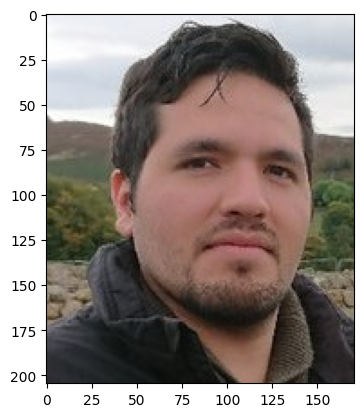

In [10]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# Read image
original_image = cv2.imread('/content/CMM560/CMM560_Topic_5/data/nomask.jpg')
# show converted because cv uses BGR, not RGB
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.show()

Then, we convert the image to grayscale so that we can apply the Viola-Jones method

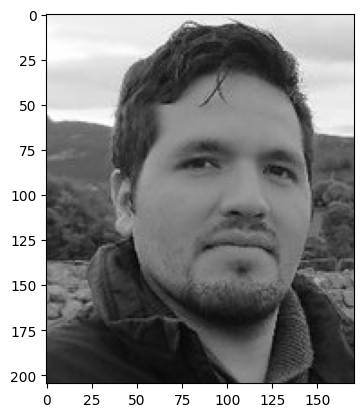

In [11]:
# Convert color image to grayscale for Viola-Jones
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# We use "gray" to specify to plt.imshow that the image is grayscale
plt.imshow(grayscale_image, 'gray')
plt.show()

Then, we download the `frontalface.xml` model from [Github](https://github.com/opencv/opencv/tree/master/data/haarcascades), load it here and use it to process the image using the `detectMultiScale` function

In [12]:
# Load the classifier and create a cascade object for face detection
face_cascade = cv2.CascadeClassifier('/content/CMM560/CMM560_Topic_5/data/haarcascade_frontalface_alt.xml')
# Detect faces
detected_faces = face_cascade.detectMultiScale(grayscale_image)
print(detected_faces)

[[ 54  43 107 107]]


Notice that we get four numbers! These are the coordinates where the face is found.

We can do a method to "draw" green rectangles over the faces as follows:

In [13]:
# Put rectangles in the images
for (column, row, width, height) in detected_faces:
    cv2.rectangle(original_image,(column, row),
        (column + width, row + height),
        (0, 255, 0),2)

Finally, we show the original image with the rectangle

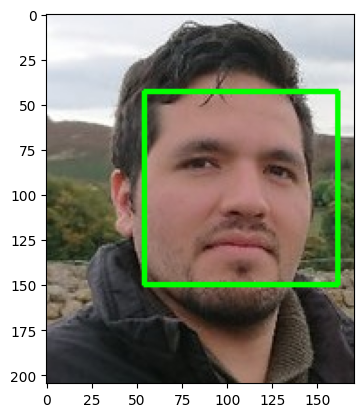

In [14]:
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.show()

Do you think this works with a facemask?

![Fig. 12. Facemask example 1](https://www.dropbox.com/s/hu4idfcm07xk528/facemask.jpg?raw=1)

[[ 310  198  154  154]
 [1138  192  203  203]
 [ 788  323  215  215]
 [ 146  383  186  186]]


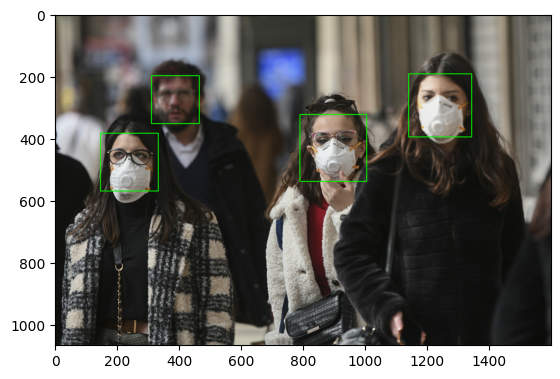

In [15]:
original_image = cv2.imread('/content/CMM560/CMM560_Topic_5/data/facemask.jpg')
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/CMM560/CMM560_Topic_5/data/haarcascade_frontalface_alt.xml')
detected_faces = face_cascade.detectMultiScale(grayscale_image)
print(detected_faces)
for (column, row, width, height) in detected_faces:
    cv2.rectangle(original_image,(column, row),
        (column + width, row + height),
        (0, 255, 0),2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.show()

How about now?

![Fig. 13. Facemask example 2](https://www.dropbox.com/s/594o736z80aauxm/facemask2.jpg?raw=1)

()


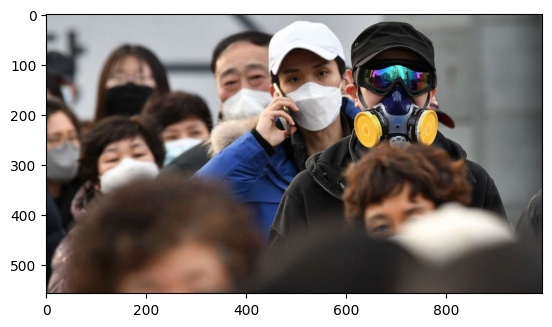

In [16]:
original_image = cv2.imread('/content/CMM560/CMM560_Topic_5/data/facemask2.jpg')
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/CMM560/CMM560_Topic_5/data/haarcascade_frontalface_alt.xml')
detected_faces = face_cascade.detectMultiScale(grayscale_image)
print(detected_faces)
for (column, row, width, height) in detected_faces:
    cv2.rectangle(original_image,(column, row),
        (column + width, row + height),
        (0, 255, 0),2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.show()

## LAB 5: "FEATURE" BASED DATA CLASSIFICATION